TensorFlow Version: 2.19.0
✅ GPU підключено! (Можна робити Скріншот 3.1)

 Завантаження датасету Stanford Dogs...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.B7F2ZA_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.B7F2ZA_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
 Завантажено. Порід: 120

📸 Генерація прикладу вхідних даних...


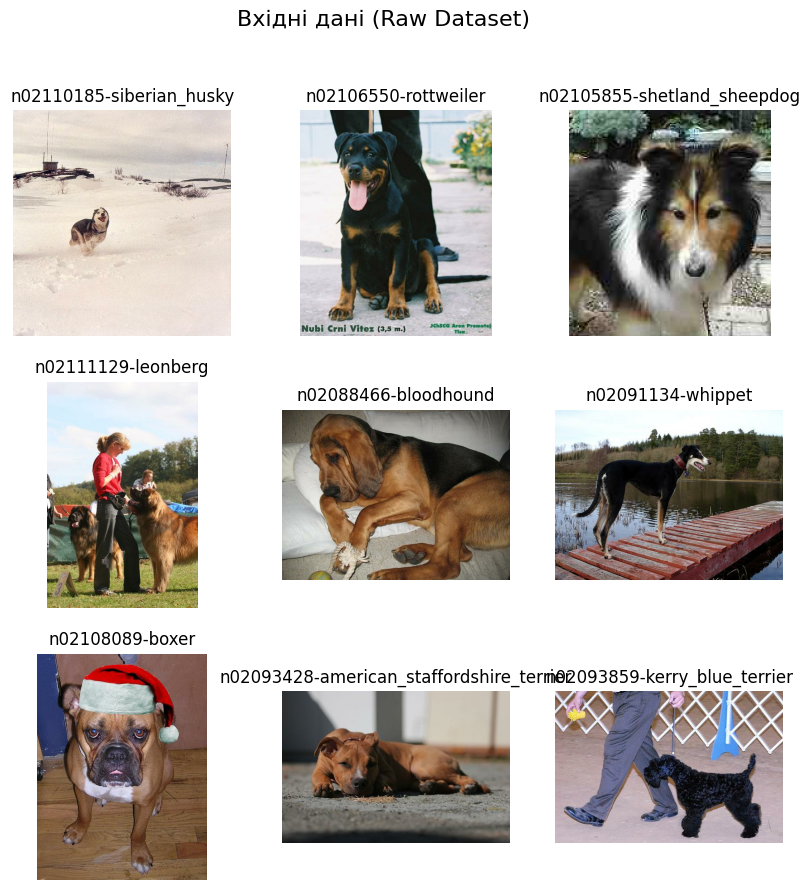


📸 Генерація прикладу аугментації...


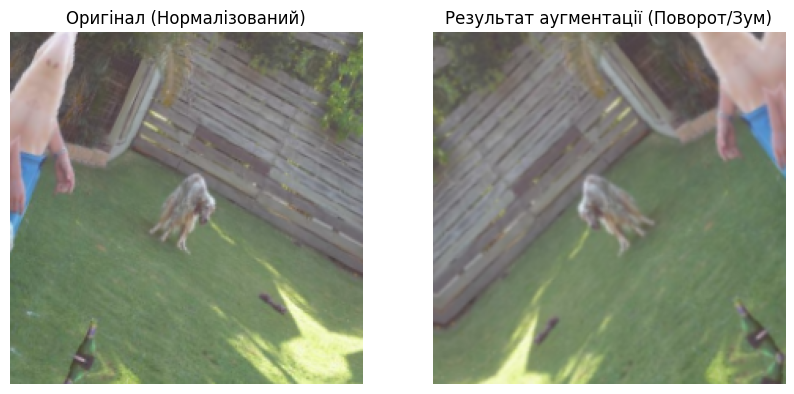


🏗️ Побудова моделі...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,411,704 (9.20 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 ЕТАП 1: Transfer Learning (5 епох)...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 165s 389ms/step - accuracy: 0.2331 - loss: 3.5321 - val_accuracy: 0.7055 - val_loss: 1.0822
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 132s 348ms/step - accuracy: 0.5422 - loss: 1.6763 - val_accuracy: 0.7319 - val_loss: 0.9190
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 368ms/step - accuracy: 0.5838 - loss: 1.4820 - val_accuracy: 0.7438 - val_loss: 0.8370
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 143s 367ms/step - accuracy: 0.6078 - loss: 1.3722 - val_accuracy: 0.7526 - val_loss: 0.8256
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 129s 340ms/step - accuracy: 0.6368 - loss: 1.2873 - val_accuracy: 0.7491 - val_loss: 0.8239
 ЕТАП 2: Fine-Tuning (5 епох)...
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 157s 366ms/step - accuracy: 0.5787 - loss: 1.5146 - val_accuracy: 0.7269 - val_loss: 0.8765
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 133s 349ms/step - accuracy: 0.6741 - loss: 1.1172 - val_accuracy: 0.7383 - val_loss: 0.8580
Epoch 7/1

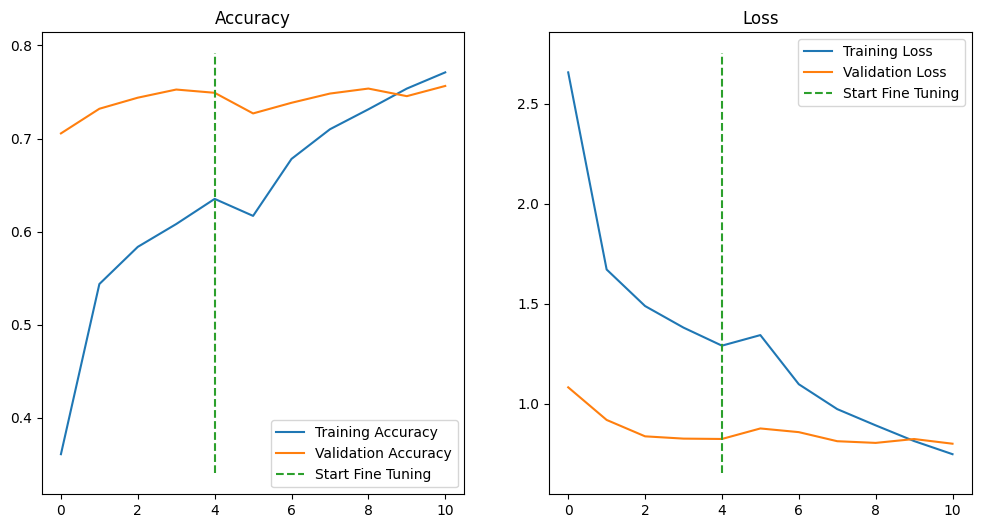


📸 Генерація прикладів роботи системи...


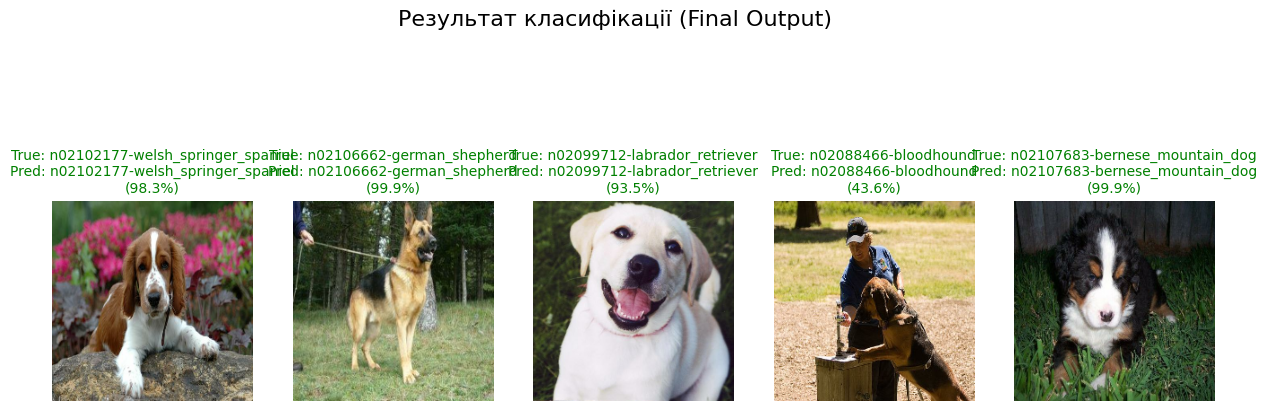

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ==========================================
# 1. ІМПОРТ ТА НАЛАШТУВАННЯ
# ==========================================
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Перевірка GPU
print(f"TensorFlow Version: {tf.__version__}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("✅ GPU підключено! (Можна робити Скріншот 3.1)")
else:
    print("⚠️ GPU не знайдено.")

# ==========================================
# 2. ЗАВАНТАЖЕННЯ ДАНИХ
# ==========================================
print("\n Завантаження датасету Stanford Dogs...")
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
class_names = ds_info.features['label'].names
print(f" Завантажено. Порід: {len(class_names)}") # (Можна робити Скріншот 3.2 - Логи)

# ==========================================
# 📸 БЛОК ВІЗУАЛІЗАЦІЇ 1: ВХІДНІ ДАНІ (Для Рис. 3.3)
# ==========================================
print("\n📸 Генерація прикладу вхідних даних...")
def show_raw_images(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis("off")
    plt.suptitle("Вхідні дані (Raw Dataset)", fontsize=16)
    plt.show()

# Показуємо 9 випадкових фото
show_raw_images(ds_train)
# 🛑 РОБИ СКРІНШОТ ТУТ ДЛЯ РИСУНКА 3.3!

# ==========================================
# 3. ПІДГОТОВКА ДАНИХ (PIPELINE)
# ==========================================
IMG_SIZE = 224
BATCH_SIZE = 32

# Визначаємо аугментацію
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

def prepare(ds, shuffle=False, augment=False):
    ds = ds.map(format_image, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.batch(BATCH_SIZE)
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                    num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Створюємо батчі
train_ds = prepare(ds_train, shuffle=True, augment=True)
test_ds = prepare(ds_test)

# ==========================================
# 📸 БЛОК ВІЗУАЛІЗАЦІЇ 2: ПРОМІЖНИЙ РЕЗУЛЬТАТ (Для Рис. 3.4)
# ==========================================
print("\n📸 Генерація прикладу аугментації...")
# Беремо одне фото з тренувального набору
for images, labels in train_ds.take(1):
    original_img = images[0]
    # Застосовуємо аугментацію ще раз вручну для демонстрації
    augmented_img = data_augmentation(tf.expand_dims(original_img, 0))[0]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Оригінал (Нормалізований)")
    plt.imshow(original_img)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Результат аугментації (Поворот/Зум)")
    plt.imshow(augmented_img)
    plt.axis("off")
    plt.show()
    break
# 🛑 РОБИ СКРІНШОТ ТУТ ДЛЯ РИСУНКА 3.4!

# ==========================================
# 4. МОДЕЛЬ ТА НАВЧАННЯ
# ==========================================
print("\n🏗️ Побудова моделі...")
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# (Тут можна зробити скріншот model.summary() для Рис 3.5)
model.summary()

# ЕТАП 1
print(" ЕТАП 1: Transfer Learning (5 епох)...")
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

# ЕТАП 2 (FINE-TUNING)
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(" ЕТАП 2: Fine-Tuning (5 епох)...")
history_fine = model.fit(train_ds,
                         epochs=10,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_ds)

# ==========================================
# 5. ГРАФІКИ (Для Рис. 3.6 / 3.7)
# ==========================================
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([4, 4], plt.ylim(), label='Start Fine Tuning', linestyle='--')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([4, 4], plt.ylim(), label='Start Fine Tuning', linestyle='--')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()
# 🛑 РОБИ СКРІНШОТ ГРАФІКІВ

# ==========================================
# 📸 БЛОК ВІЗУАЛІЗАЦІЇ 3: ОСТАТОЧНИЙ РЕЗУЛЬТАТ (Для Рис. 3.8)
# ==========================================
print("\n📸 Генерація прикладів роботи системи...")
plt.figure(figsize=(15, 6))
# Беремо 1 батч з тесту
for images, labels in test_ds.take(1):
    preds = model.predict(images, verbose=0)

    # Показуємо 5 фото
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])

        true_label = class_names[labels[i]]
        pred_label = class_names[np.argmax(preds[i])]
        conf = 100 * np.max(preds[i])

        color = 'green' if true_label == pred_label else 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label}\n({conf:.1f}%)",
                  color=color, fontsize=10)
        plt.axis("off")
plt.suptitle("Результат класифікації (Final Output)", fontsize=16)
plt.show()
# Зберігаємо модель у файл
model.save('dog_breed_model.h5')

# Скачуємо файл на комп'ютер
from google.colab import files
files.download('dog_breed_model.h5')
# 🛑 РОБИ СКРІНШОТ ТУТ ДЛЯ РИСУНКА 3.8!